# Multilayer Perceptron Training

## Python Imports

In [1]:
import pickle

import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from notebooks.utilities import data, ml_stats, sampling
from notebooks.utilities import train_test_split as tts
from notebooks.utilities import vectorize
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

## Load Data

In [2]:
df = data.neutral()

In [3]:
df_sampled = sampling.undersample(df)

In [38]:
df["class"].value_counts()

0    200372
1     45092
Name: class, dtype: int64

## Relu Training Function

In [4]:
def mlp(
    X_train, y_train, X_test, y_test, name, class_weight=None, epochs=15, batch_size=64,
):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(y_train.shape[1], activation="softmax"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()

    history = model.fit(
        X_train,
        y_train,
        class_weight=class_weight,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
    )
    print(model.evaluate(X_train, y_train))
    model.save(f"../../models/neutral_models/{name}")
    return np.argmax(model.predict(X_test), axis=1), model, history

## Sigmoid Training Function

In [5]:
def sig_mlp(
    X_train, y_train, X_test, y_test, name, class_weight=None, epochs=15, batch_size=64,
):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(64, activation="sigmoid"))
    model.add(Dense(8, activation="sigmoid"))
    model.add(Dense(y_train.shape[1], activation="softmax"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()

    history = model.fit(
        X_train,
        y_train,
        class_weight=class_weight,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
    )
    print(model.evaluate(X_train, y_train))
    model.save(f"../../models/neutral_models/{name}")
    return np.argmax(model.predict(X_test), axis=1), model, history

## TF-IDF Vectorizer

### Vectorization

In [6]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "mlp", max_df=0.9, min_df=50, vocab=True
)

Time to vectorize:  20.00
Length of vocabulary: 5595


### Train-Test Splits

In [7]:
y = tts.encode_outputs(df_sampled["class"])

In [8]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [9]:
y_pred, model, history = mlp(X_train, y_train, X_test, y_test, "mlp_tfidf", epochs=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                358144    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 362,842
Trainable params: 362,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1128/1128 [==============================] - 4s 3ms/step - loss: 0.3449 - accuracy: 0.8419 - val_loss: 0.2146 - val_accuracy: 0.9127
Epoch 2/10
1128/1128 [==============================] - 2s 2ms/step - loss: 0.1831 - accuracy: 0.9272 - 

### Metrics

In [10]:
ml_stats.validation(y_test, y_pred)

0.9066363585962189
0.5970505072905694


In [11]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9115024766097963
Class 1 Accuracy: 0.9016979445933869


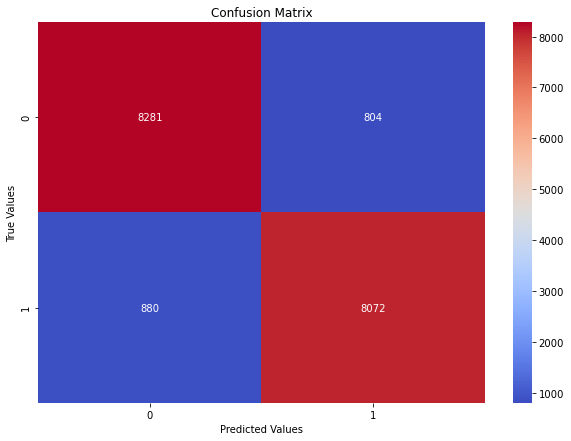

In [12]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [13]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.91

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

     Class 0       0.90      0.91      0.91      9085
     Class 1       0.91      0.90      0.91      8952

    accuracy                           0.91     18037
   macro avg       0.91      0.91      0.91     18037
weighted avg       0.91      0.91      0.91     18037



## Sigmoid TF-IDF Vectorizer

### Vectorization

In [14]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "sig_mlp", max_df=0.9, min_df=50, vocab=True
)

Time to vectorize:  19.17
Length of vocabulary: 5595


### Train-Test Splits

In [15]:
y = tts.encode_outputs(df_sampled["class"])

In [16]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [17]:
y_pred, model, history = sig_mlp(
    X_train, y_train, X_test, y_test, "sig_mlp_tfidf", epochs=10
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                358144    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 18        
Total params: 362,842
Trainable params: 362,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1128/1128 [==============================] - 3s 2ms/step - loss: 0.4666 - accuracy: 0.7993 - val_loss: 0.2304 - val_accuracy: 0.9137
Epoch 2/10
1128/1128 [==============================] - 2s 2ms/step - loss: 0.2004 - accuracy: 0.9287 

### Metrics

In [18]:
ml_stats.validation(y_test, y_pred)

0.9167267283916394
0.5869601374951489


In [19]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9368189323059989
Class 1 Accuracy: 0.8963360142984808


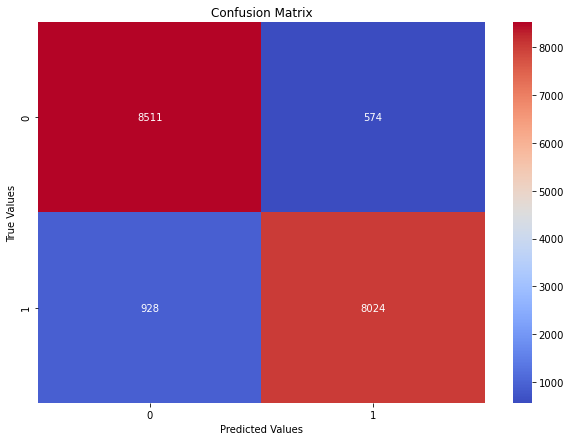

In [20]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [21]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.92
Macro Recall: 0.92
Macro F1-score: 0.92

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.92

Classification Report

              precision    recall  f1-score   support

     Class 0       0.90      0.94      0.92      9085
     Class 1       0.93      0.90      0.91      8952

    accuracy                           0.92     18037
   macro avg       0.92      0.92      0.92     18037
weighted avg       0.92      0.92      0.92     18037



## Count Vectorizer

### Vectorization

In [22]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "mlp", max_df=0.9, min_df=50, vocab=True
)

Time to vectorize:  17.96
Length of vocabulary: 5595


### Train-Test-Splits

In [23]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [24]:
y_pred, model, history = mlp(X_train, y_train, X_test, y_test, "mlp_count", epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                358144    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 18        
Total params: 362,842
Trainable params: 362,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1128/1128 [==============================] - 3s 3ms/step - loss: 0.3388 - accuracy: 0.8668 - val_loss: 0.2097 - val_accuracy: 0.9179
Epoch 2/10
1128/1128 [==============================] - 3s 2ms/step - loss: 0.1539 - accuracy: 0.9409 

### Metrics

In [25]:
ml_stats.validation(y_test, y_pred)

0.9003714586682929
0.6033154072184953


In [26]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.8910291689598239
Class 1 Accuracy: 0.9098525469168901


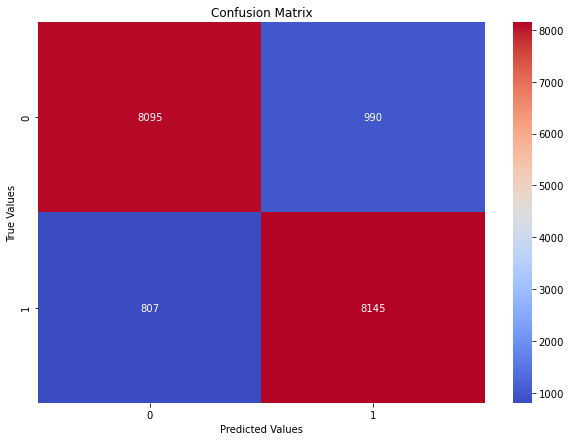

In [27]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [28]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.90
Macro Recall: 0.90
Macro F1-score: 0.90

Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90

Classification Report

              precision    recall  f1-score   support

     Class 0       0.91      0.89      0.90      9085
     Class 1       0.89      0.91      0.90      8952

    accuracy                           0.90     18037
   macro avg       0.90      0.90      0.90     18037
weighted avg       0.90      0.90      0.90     18037



## Sigmoid Count Vectorizer

### Vectorization

In [29]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "sig_mlp", max_df=0.9, min_df=50, vocab=True
)

Time to vectorize:  18.98
Length of vocabulary: 5595


### Train-Test-Splits

In [30]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [31]:
y_pred, model, history = mlp(
    X_train, y_train, X_test, y_test, "sig_mlp_count", epochs=10
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                358144    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 18        
Total params: 362,842
Trainable params: 362,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1128/1128 [==============================] - 4s 3ms/step - loss: 0.3473 - accuracy: 0.8630 - val_loss: 0.2133 - val_accuracy: 0.9153
Epoch 2/10
1128/1128 [==============================] - 3s 3ms/step - loss: 0.1571 - accuracy: 0.9404 

### Metrics

In [32]:
ml_stats.validation(y_test, y_pred)

0.9059710594888285
0.5977158063979597


In [33]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9270225646670336
Class 1 Accuracy: 0.8846067917783735


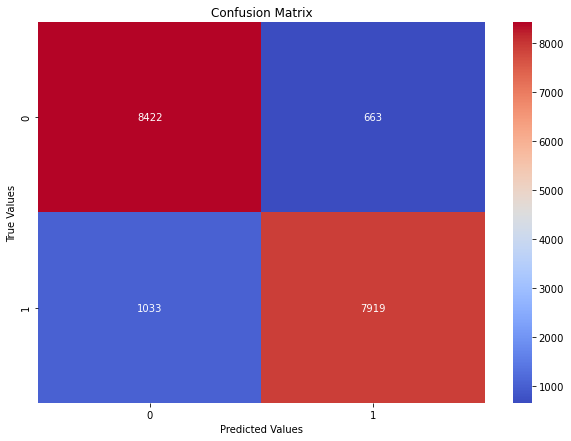

In [34]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [35]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.91

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

     Class 0       0.89      0.93      0.91      9085
     Class 1       0.92      0.88      0.90      8952

    accuracy                           0.91     18037
   macro avg       0.91      0.91      0.91     18037
weighted avg       0.91      0.91      0.91     18037

